<a href="https://colab.research.google.com/github/amryzoelfa/proyek-analisis-data/blob/main/m005d4ky22141_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Amry Zulfa Al Husna
- **Email:** amryzoelfa@gmail.com
- **ID Dicoding:** amryzoelfa

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda berubah sepanjang tahun 2011 dan 2012?
- Apakah kondisi cuaca mempengaruhi jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

df_hour = pd.read_csv('/content/drive/My Drive/proyek-analisis-data/data/hour.csv')
df_day = pd.read_csv('/content/drive/My Drive/proyek-analisis-data/data/day.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Assessing Data

In [6]:
print(df_hour.info())
print(df_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

### Cleaning Data

In [7]:
df_hour.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)
df_day.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
print(df_hour.describe())
print(df_day.describe())

             season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357    

## Visualization & Explanatory Analysis

### Pertanyaan 1:

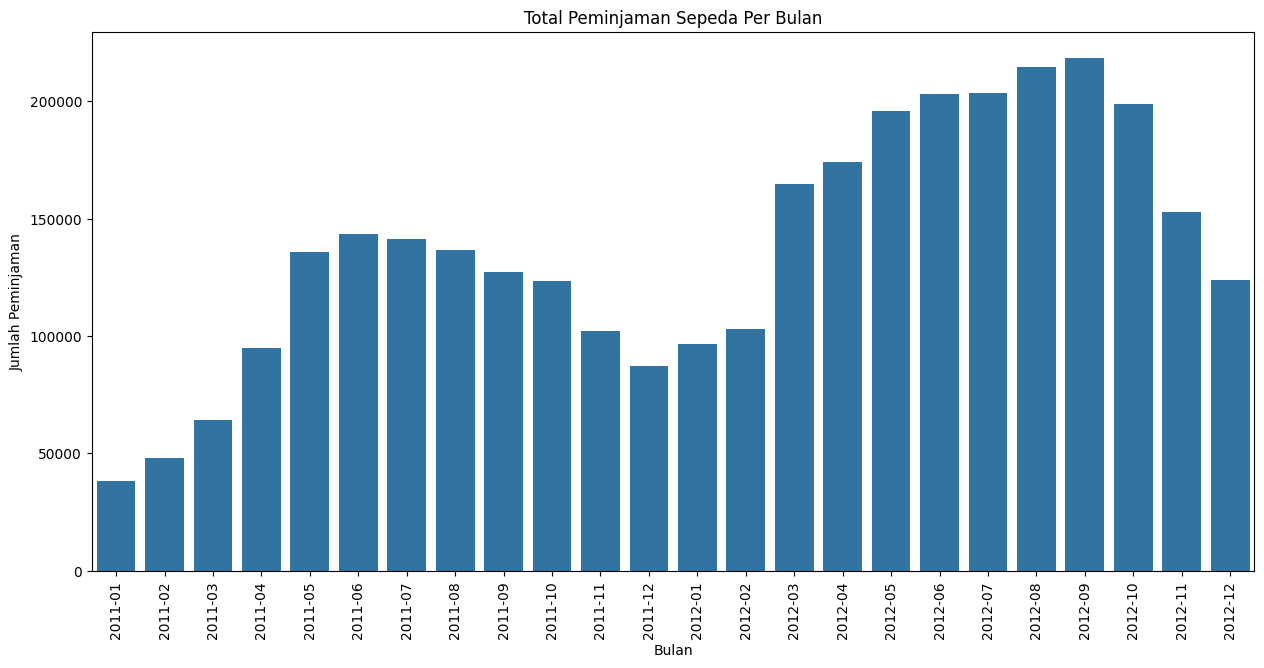

In [17]:
# plt.figure(figsize=(14,7))
# sns.lineplot(data=df_day, x='dteday', y='cnt')
# plt.title('Tren Peminjaman Sepeda Harian')
# plt.xlabel('Tanggal')
# plt.ylabel('Jumlah Peminjaman')
# plt.show()

# Pastikan bahwa kolom 'dteday' sudah dalam format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

df_day['month'] = df_day['dteday'].dt.to_period('M')

# Mengelompokkan berdasarkan kolom 'month' dan menjumlahkan kolom 'cnt'
monthly_totals = df_day.groupby('month')['cnt'].sum().reset_index()
# monthly_totals

# Visualisasi data peminjaman sepeda per bulan
plt.figure(figsize=(15, 7))
sns.barplot(data=monthly_totals, x='month', y='cnt')
plt.title('Total Peminjaman Sepeda Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=90)
plt.show()

### Pertanyaan 2:

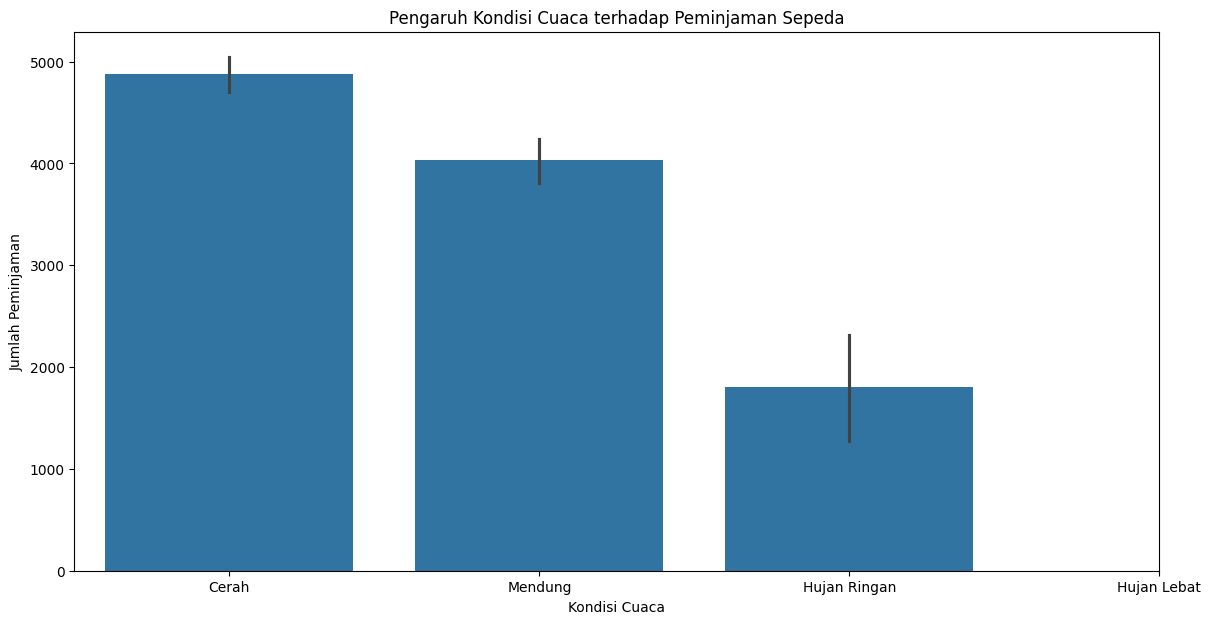

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(data=df_day, x='weathersit', y='cnt')
plt.title('Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Lebat'])
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan visualisasi total peminjaman sepeda per bulan, kita dapat melihat bahwa tren peminjaman sepeda mengalami fluktuasi sepanjang tahun 2011 dan 2012. Biasanya, peminjaman meningkat selama bulan-bulan hangat (dari Mei hingga Oktober) dan menurun selama bulan-bulan dingin (November hingga Februari). Hal ini menunjukkan bahwa cuaca dan musim memainkan peran penting dalam pola peminjaman sepeda. Meningkatnya jumlah peminjaman selama bulan-bulan hangat mungkin dikaitkan dengan kondisi cuaca yang lebih nyaman untuk bersepeda.
- Conclution pertanyaan 2 : Kondisi cuaca cerah cenderung memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan kondisi cuaca lainnya.